In [1]:
import modulo_toolbox as mtb
import os
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier, XGBRegressor

df = mtb.pd.read_csv("./data/BankChurners.csv")

In [2]:
df.head(15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6          Unknown        Married         $120K +          Gold   
7      High School        Unknown     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Unknown         $120K +          Blue   
11         Unknown        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Unknown     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...       12691.0                  777          11914.0   
1               44  ...        8256.0                  864           7392.0   
2               36  ...        3418.0                    0           3418.0   
3               34  ...        3313.0                 2517            796.0   
4               21  ...        4716.0                    0           4716.0   
5               36  ...        4010.0                 1247           2763.0   
6               46  ...       34516.0                 2264          32252.0   
7               27  ...       29081.0                 1396          27685.0   
8               36  ...       22352.0                 2517          19835.0   
9               36  ...       11656.0                 1677           9979.0   
10              31  ...        6748.0                 1467           5281.0   
11              54  ...        9095.0                 1587           7508.0   
12              36  ...       11751.0                    0          11751.0   
13              30  ...        8547.0                 1666           6881.0   
14              48  ...        2436.0                  680           1756.0   

    Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  1.335             1144              42   
1                  1.541             1291              33   
2                  2.594             1887              20   
3                  1.405             1171              20   
4                  2.175              816              28   
5                  1.376             1088              24   
6                  1.975             1330             

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
mtb.tb.describe_df(df)

CLIENTNUM Attrition_Flag Customer_Age    Gender  \
Data type                   int64         object        int64    object   
Percent missing (%)           0.0            0.0          0.0       0.0   
Unique values               10127              2           45         2   
Cardinality percent (%)     100.0       0.019749     0.444357  0.019749   

                        Dependent_count Education_Level Marital_Status  \
Data type                         int64          object         object   
Percent missing (%)                 0.0             0.0            0.0   
Unique values                         6               7              4   
Cardinality percent (%)        0.059248        0.069122       0.039498   

                        Income_Category Card_Category Months_on_book  ...  \
Data type                        object        object          int64  ...   
Percent missing (%)                 0.0           0.0            0.0  ...   
Unique values                         6             4             44  ...   
Cardinality percent (%)        0.059248      0.039498       0.434482  ...   

                        Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
Data type                    float64               int64         float64   
Percent missing (%)              0.0                 0.0             0.0   
Unique values                   6205                1974            6813   
Cardinality percent (%)    61.271848           19.492446         67.2756   

                        Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct  \
Data type                            float64           int64          int64   
Percent missing (%)                      0.0             0.0            0.0   
Unique values                           1158            5033            126   
Cardinality percent (%)            11.434778       49.698825       1.244199   

                        Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  \
Data type                           float64               float64   
Percent missing (%)                     0.0                   0.0   
Unique values                           830                   964   
Cardinality percent (%)            8.195912              9.519107   

                        Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
Data type                                                          float64                                                                                   
Percent missing (%)                                                    0.0                                                                                   
Unique values                                                         1704                                                                                   
Cardinality percent (%)                                          16.826306                                                                                   

                        Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
Data type                                                          float64                                                                                  
Percent missing (%)                                                    0.0                                                                                  
Unique values                                                          640                                                                                  
Cardinality percent (%)                                           6.319739                                                                                  

[4 rows x 23 columns]

In [6]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [7]:
mtb.tb.tipifica_variables(df,7,0.7)

nombre_variable      tipo_sugerido
0                                           CLIENTNUM  Numerica Continua
1                                      Attrition_Flag            Binaria
2                                        Customer_Age  Numerica Discreta
3                                              Gender            Binaria
4                                     Dependent_count         Categórica
5                                     Education_Level  Numerica Discreta
6                                      Marital_Status         Categórica
7                                     Income_Category         Categórica
8                                       Card_Category         Categórica
9                                      Months_on_book  Numerica Discreta
10                           Total_Relationship_Count         Categórica
11                             Months_Inactive_12_mon  Numerica Discreta
12                              Contacts_Count_12_mon  Numerica Discreta
13                                       Credit_Limit  Numerica Discreta
14                                Total_Revolving_Bal  Numerica Discreta
15                                    Avg_Open_To_Buy  Numerica Discreta
16                               Total_Amt_Chng_Q4_Q1  Numerica Discreta
17                                    Total_Trans_Amt  Numerica Discreta
18                                     Total_Trans_Ct  Numerica Discreta
19                                Total_Ct_Chng_Q4_Q1  Numerica Discreta
20                              Avg_Utilization_Ratio  Numerica Discreta
21  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...  Numerica Discreta
22  Naive_Bayes_Classifier_Attrition_Flag_Card_Cat...  Numerica Discreta

In [8]:
target = "Attrition_Flag"

In [9]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42, stratify=df["Attrition_Flag"])

In [10]:
train_set[target].value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [11]:
train_set.shape

(8101, 23)

In [12]:
numeric_features = mtb.get_features_num_classification(train_set,target) # enma

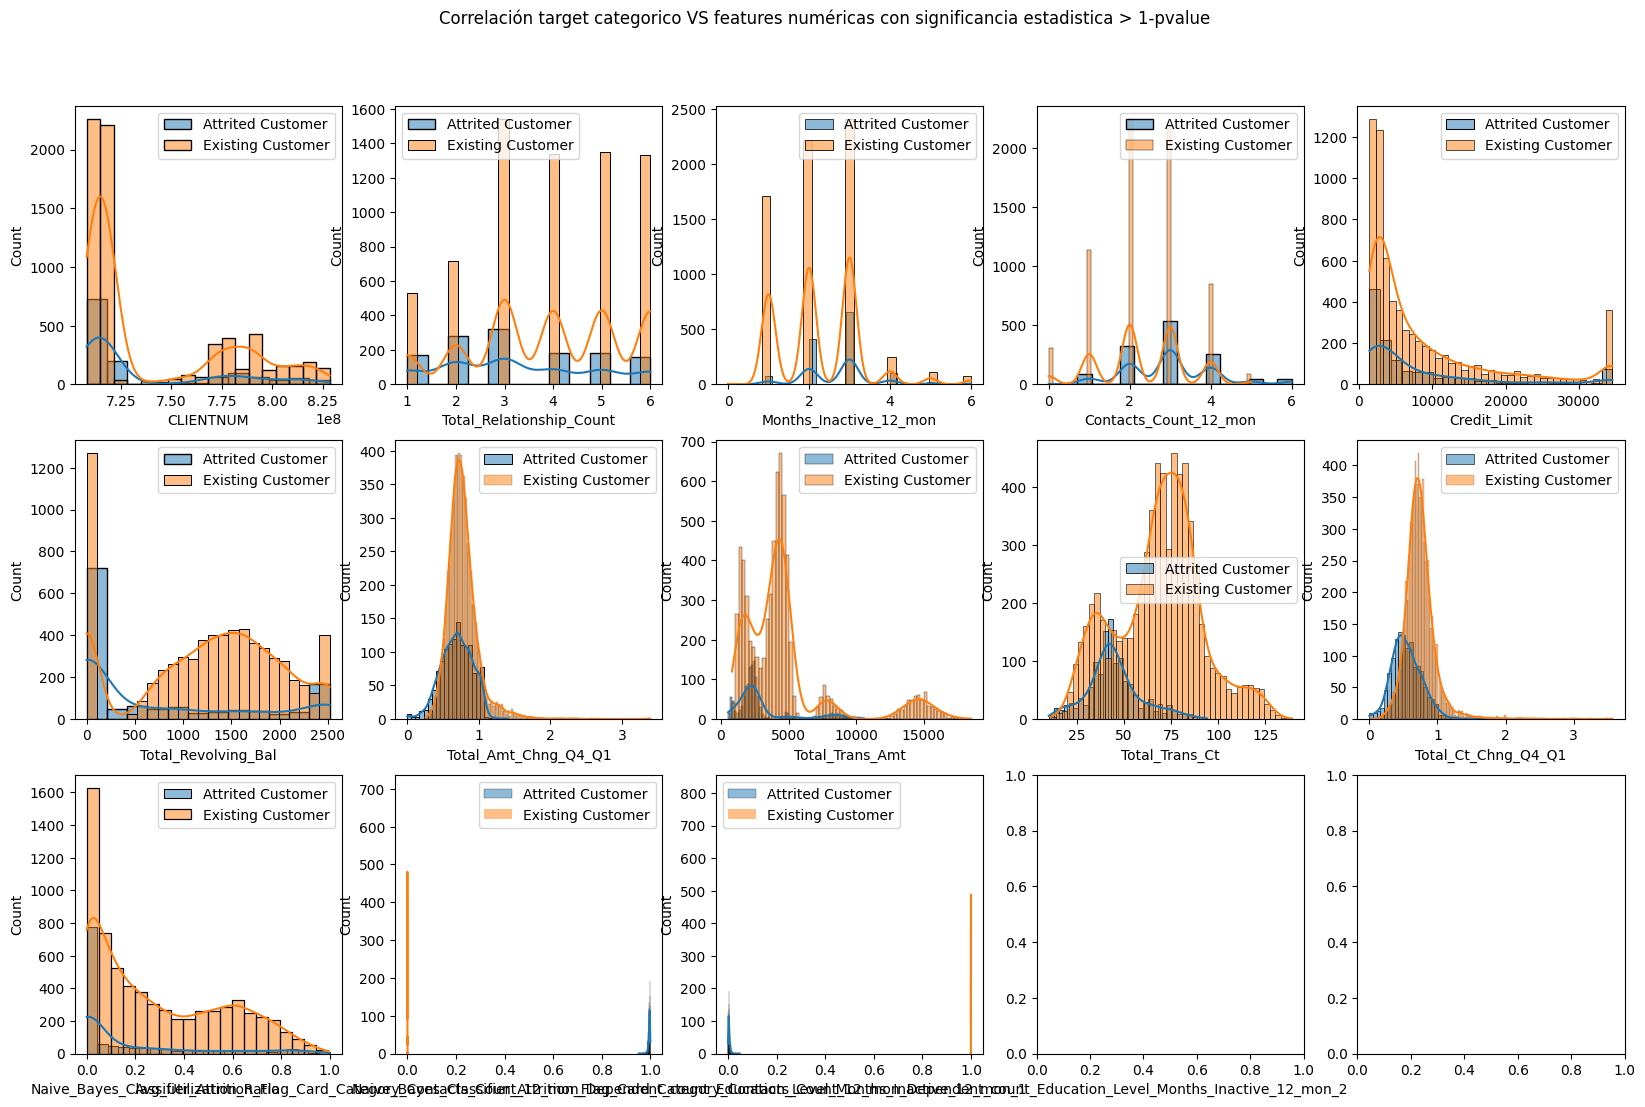

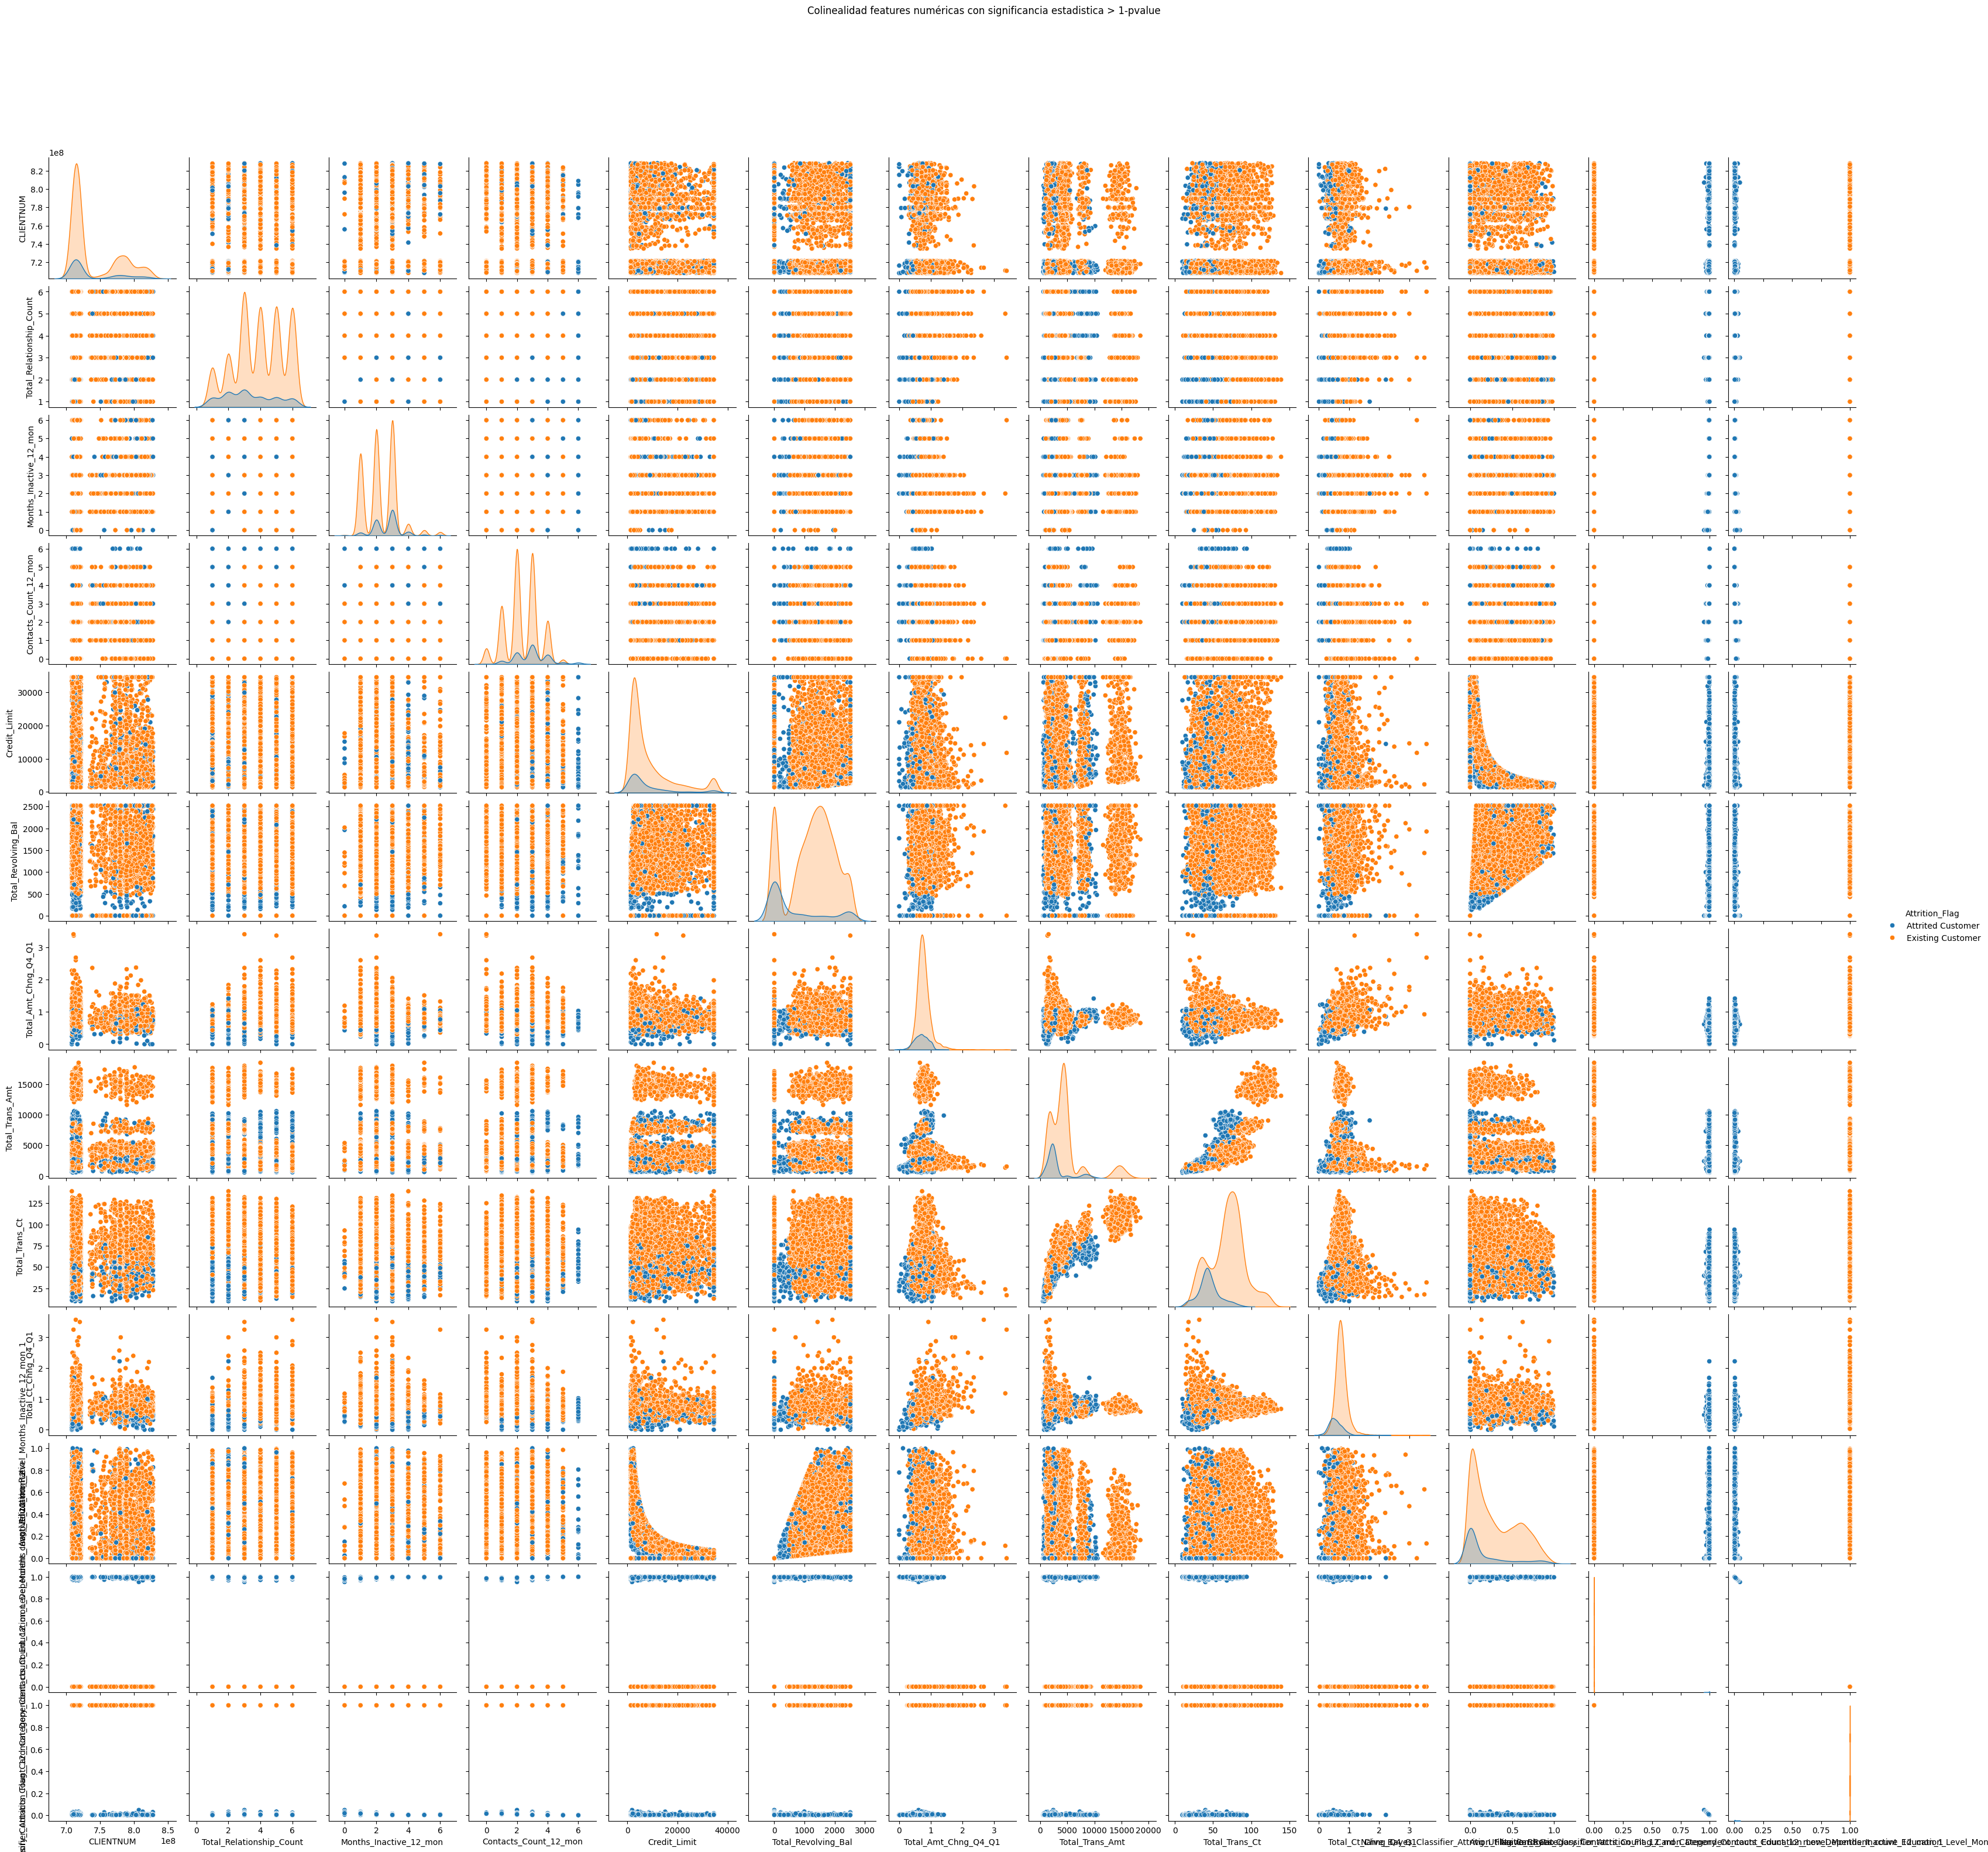

['CLIENTNUM',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [13]:
mtb.plot_features_num_classification(train_set,target) # fran

In [14]:
numeric_features

['CLIENTNUM',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [15]:
categorical_features = mtb.get_features_cat_classification(train_set,target) # naim

<Figure size 1000x600 with 0 Axes>

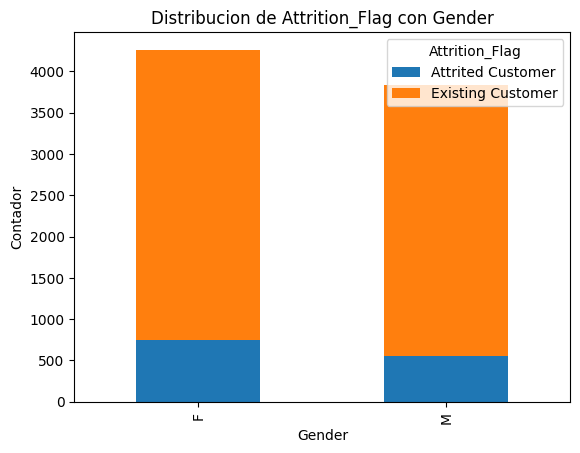

<Figure size 1000x600 with 0 Axes>

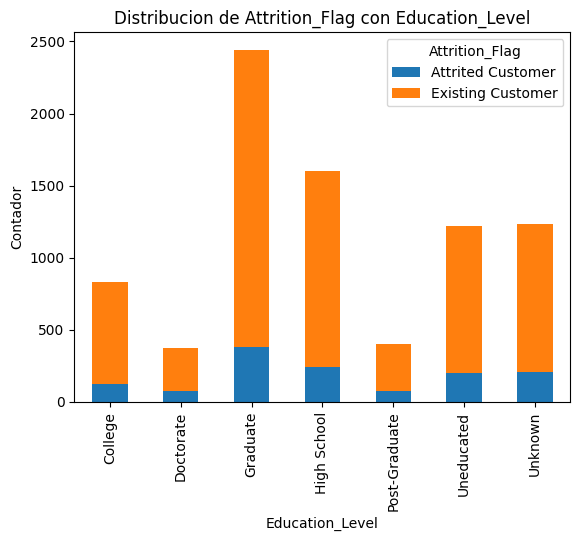

<Figure size 1000x600 with 0 Axes>

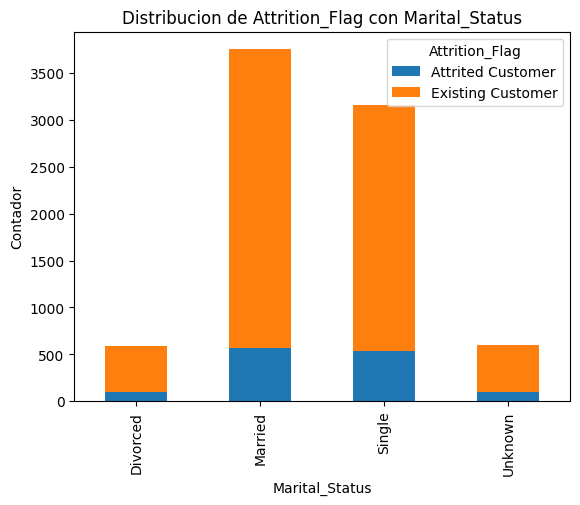

<Figure size 1000x600 with 0 Axes>

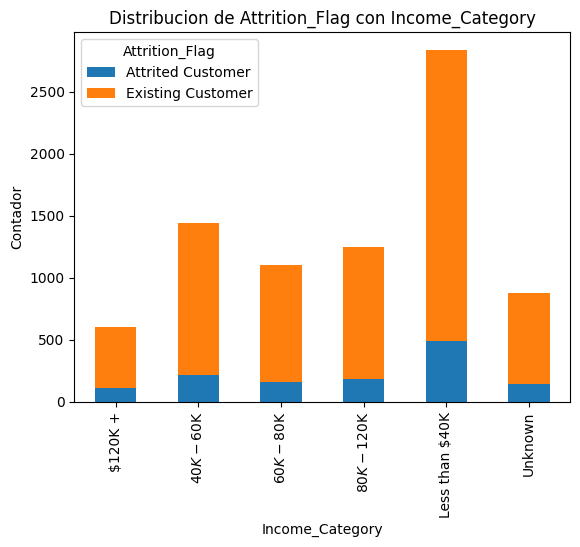

<Figure size 1000x600 with 0 Axes>

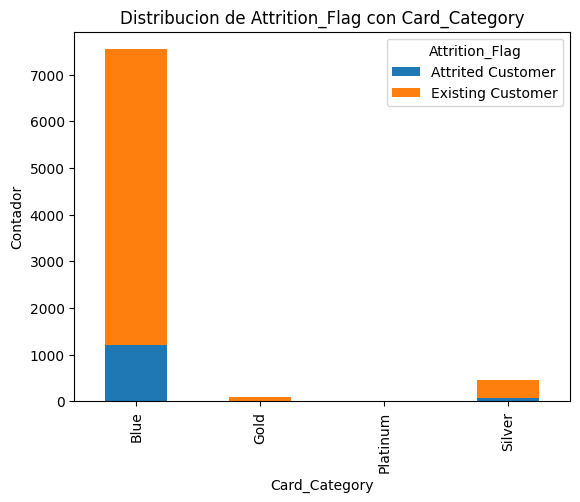

In [16]:
mtb.plot_features_cat_classification(train_set,target) # unai

In [17]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [18]:
# Preprocesamiento de características numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


In [19]:
X = df[numeric_features + categorical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Definir la búsqueda en cuadrícula de parámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CLIENTNUM',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Credit_Limit',
                                                                          'Total_Revolving_Bal',
                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                          'Total_Trans_Amt',
                                                                          'Total_Trans_Ct',
                                                                          'Total_Ct_Chng_Q4_Q1',
                                                                          'Avg_Utilization_Ratio',
                                                                          'Nai...
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [4, 6, 8, 10, 12],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [22]:
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ", grid_search.best_score_)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Evaluar el rendimiento
print(classification_report(y_test, y_pred))

Mejores parámetros encontrados:  {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Mejor puntuación de validación cruzada:  1.0
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       327
Existing Customer       1.00      1.00      1.00      1699

         accuracy                           1.00      2026
        macro avg       1.00      1.00      1.00      2026
     weighted avg       1.00      1.00      1.00      2026



In [23]:
modelo = grid_search.best_estimator_
y_pred = modelo.predict(X_test)
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       327
Existing Customer       1.00      1.00      1.00      1699

         accuracy                           1.00      2026
        macro avg       1.00      1.00      1.00      2026
     weighted avg       1.00      1.00      1.00      2026



In [24]:
mtb.eval_model(y_test,y_pred,"classification",["ACCURACY"]) # alber

<class 'list'>
Accuracy: 1.0


(1.0,)

<class 'list'>
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix
[[ 327    0]
 [   0 1699]]


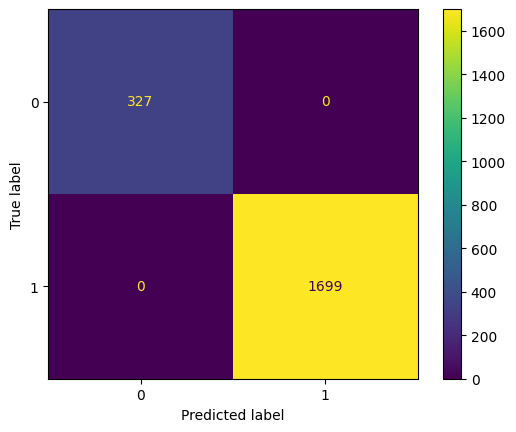

(1.0, 1.0, 1.0)

In [25]:
mtb.eval_model(y_test,y_pred,"classification",['ACCURACY', 'PRECISION', 'RECALL', 'CLASS REPORT', 'MATRIX']) # alber